In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load datasets
df_orders = pd.read_csv("C_Orders.csv")
df_products = pd.read_csv("C_Products.csv")
df_sales = pd.read_csv("C_Sales.csv")
df_customers = pd.read_csv("C_Customers.csv")



In [2]:
# Convert order_date to datetime
df_orders["order_date"] = pd.to_datetime(df_orders["order_date"], errors='coerce')

# ---- Sales Forecast ----
print("Processing sales forecast...")
df_sales = df_sales.merge(df_orders[['order_id', 'order_date']], on='order_id', how='left')
df_sales_monthly = df_sales.groupby(df_sales["order_date"].dt.to_period("M")).agg({"total_revenue": "sum"}).reset_index()
df_sales_monthly["month_num"] = np.arange(len(df_sales_monthly))

X_sales = df_sales_monthly[["month_num"]]
y_sales = df_sales_monthly["total_revenue"]

model_sales = LinearRegression()
model_sales.fit(X_sales, y_sales)
future_sales_months = np.arange(len(df_sales_monthly), len(df_sales_monthly) + 6).reshape(-1, 1)
future_sales = model_sales.predict(future_sales_months)


Processing sales forecast...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


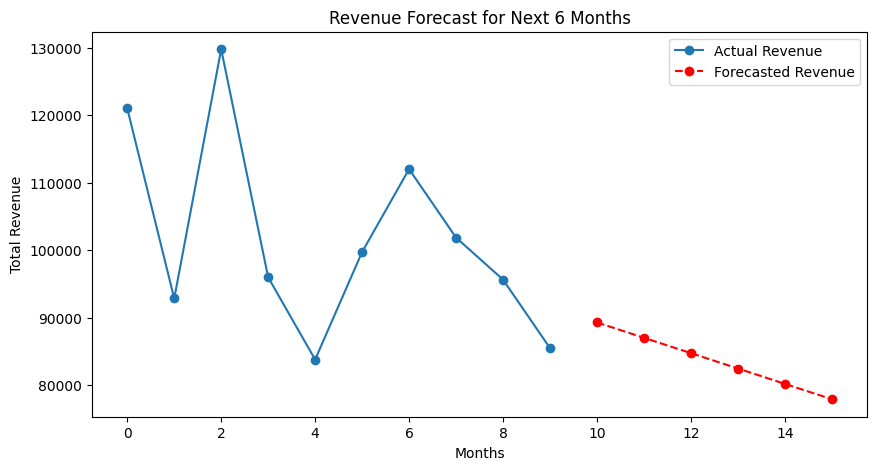

In [3]:
# Plot sales forecast
plt.figure(figsize=(10, 5))
plt.plot(df_sales_monthly["month_num"], df_sales_monthly["total_revenue"], marker='o', label="Actual Revenue")
plt.plot(future_sales_months, future_sales, marker='o', linestyle='dashed', color='red', label="Forecasted Revenue")
plt.xlabel("Months")
plt.ylabel("Total Revenue")
plt.title("Revenue Forecast for Next 6 Months")
plt.legend()
plt.show()


In [7]:
# Sales Summary Table
sales_summary = pd.DataFrame({
    "Month": list(df_sales_monthly["order_date"].astype(str)) + [f"Forecast {i+1}" for i in range(6)],
    "Total Revenue": list(df_sales_monthly["total_revenue"]) + list(future_sales)
})
print("\nSales Summary:")
print(sales_summary.to_string(index=False))


Sales Summary:
     Month  Total Revenue
   2021-01  120999.000000
   2021-02   92826.000000
   2021-03  129775.000000
   2021-04   95965.000000
   2021-05   83766.000000
   2021-06   99719.000000
   2021-07  112001.000000
   2021-08  101852.000000
   2021-09   95622.000000
   2021-10   85475.000000
Forecast 1   89276.733333
Forecast 2   86999.775758
Forecast 3   84722.818182
Forecast 4   82445.860606
Forecast 5   80168.903030
Forecast 6   77891.945455


In [4]:
# ---- Customer Trends Forecast ----
print("Processing customer trends forecast...")
df_customers_monthly = df_orders.groupby(df_orders["order_date"].dt.to_period("M"))["customer_id"].nunique().reset_index()
df_customers_monthly["month_num"] = np.arange(len(df_customers_monthly))

X_customers = df_customers_monthly[["month_num"]]
y_customers = df_customers_monthly["customer_id"]

model_customers = LinearRegression()
model_customers.fit(X_customers, y_customers)
future_customers_months = np.arange(len(df_customers_monthly), len(df_customers_monthly) + 6).reshape(-1, 1)
future_customers = model_customers.predict(future_customers_months)

Processing customer trends forecast...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


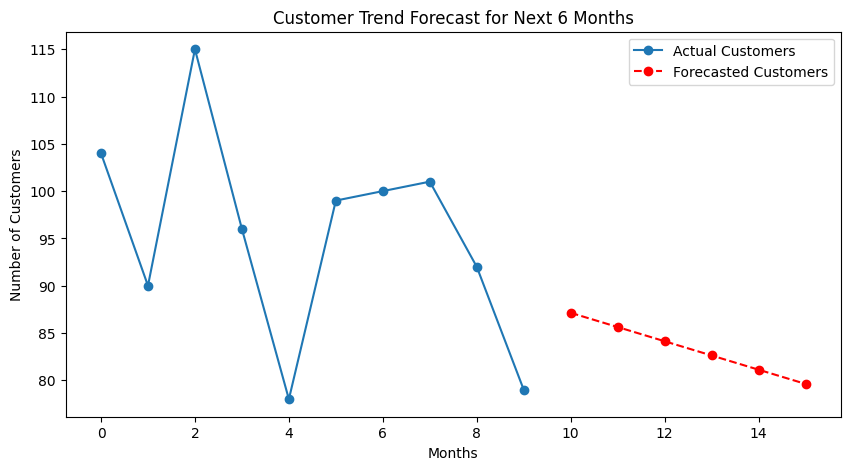

In [5]:
# Plot customer forecast
plt.figure(figsize=(10, 5))
plt.plot(df_customers_monthly["month_num"], df_customers_monthly["customer_id"], marker='o', label="Actual Customers")
plt.plot(future_customers_months, future_customers, marker='o', linestyle='dashed', color='red', label="Forecasted Customers")
plt.xlabel("Months")
plt.ylabel("Number of Customers")
plt.title("Customer Trend Forecast for Next 6 Months")
plt.legend()
plt.show()


In [8]:
# Customer Trends Summary Table
customer_summary = pd.DataFrame({
    "Month": list(df_customers_monthly["order_date"].astype(str)) + [f"Forecast {i+1}" for i in range(6)],
    "Number of Customers": list(df_customers_monthly["customer_id"]) + list(future_customers)
})
print("\nCustomer Trends Summary:")
print(customer_summary.to_string(index=False))


Customer Trends Summary:
     Month  Number of Customers
   2021-01           104.000000
   2021-02            90.000000
   2021-03           115.000000
   2021-04            96.000000
   2021-05            78.000000
   2021-06            99.000000
   2021-07           100.000000
   2021-08           101.000000
   2021-09            92.000000
   2021-10            79.000000
Forecast 1            87.133333
Forecast 2            85.630303
Forecast 3            84.127273
Forecast 4            82.624242
Forecast 5            81.121212
Forecast 6            79.618182
